In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 156MB/s]

2023-04-21 06:15:00.681480: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-21 06:15:01.631248: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 10.7MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 70.8ms
Speed: 0.7ms pre-process, 70.8ms inference, 353.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72713, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="yx4HTqTWuj2cxx44fsYG")
project = rf.workspace("apples-eq4ml").project("weeds-and-carrot-counter")
dataset = project.version(2).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to Weeds-and-Carrot-Counter-2 in yolov8:: 100%|██████████| 2184/2184 [00:01<00:00, 1879.12it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=800 plots=True patience=8

/content
100% 21.5M/21.5M [00:00<00:00, 264MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Weeds-and-Carrot-Counter-2/data.yaml, epochs=20, patience=8, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch550.jpg
events.out.tfevents.1682057779.69adf253362b.1206.0  train_batch551.jpg
F1_curve.png					    train_batch552.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


/content


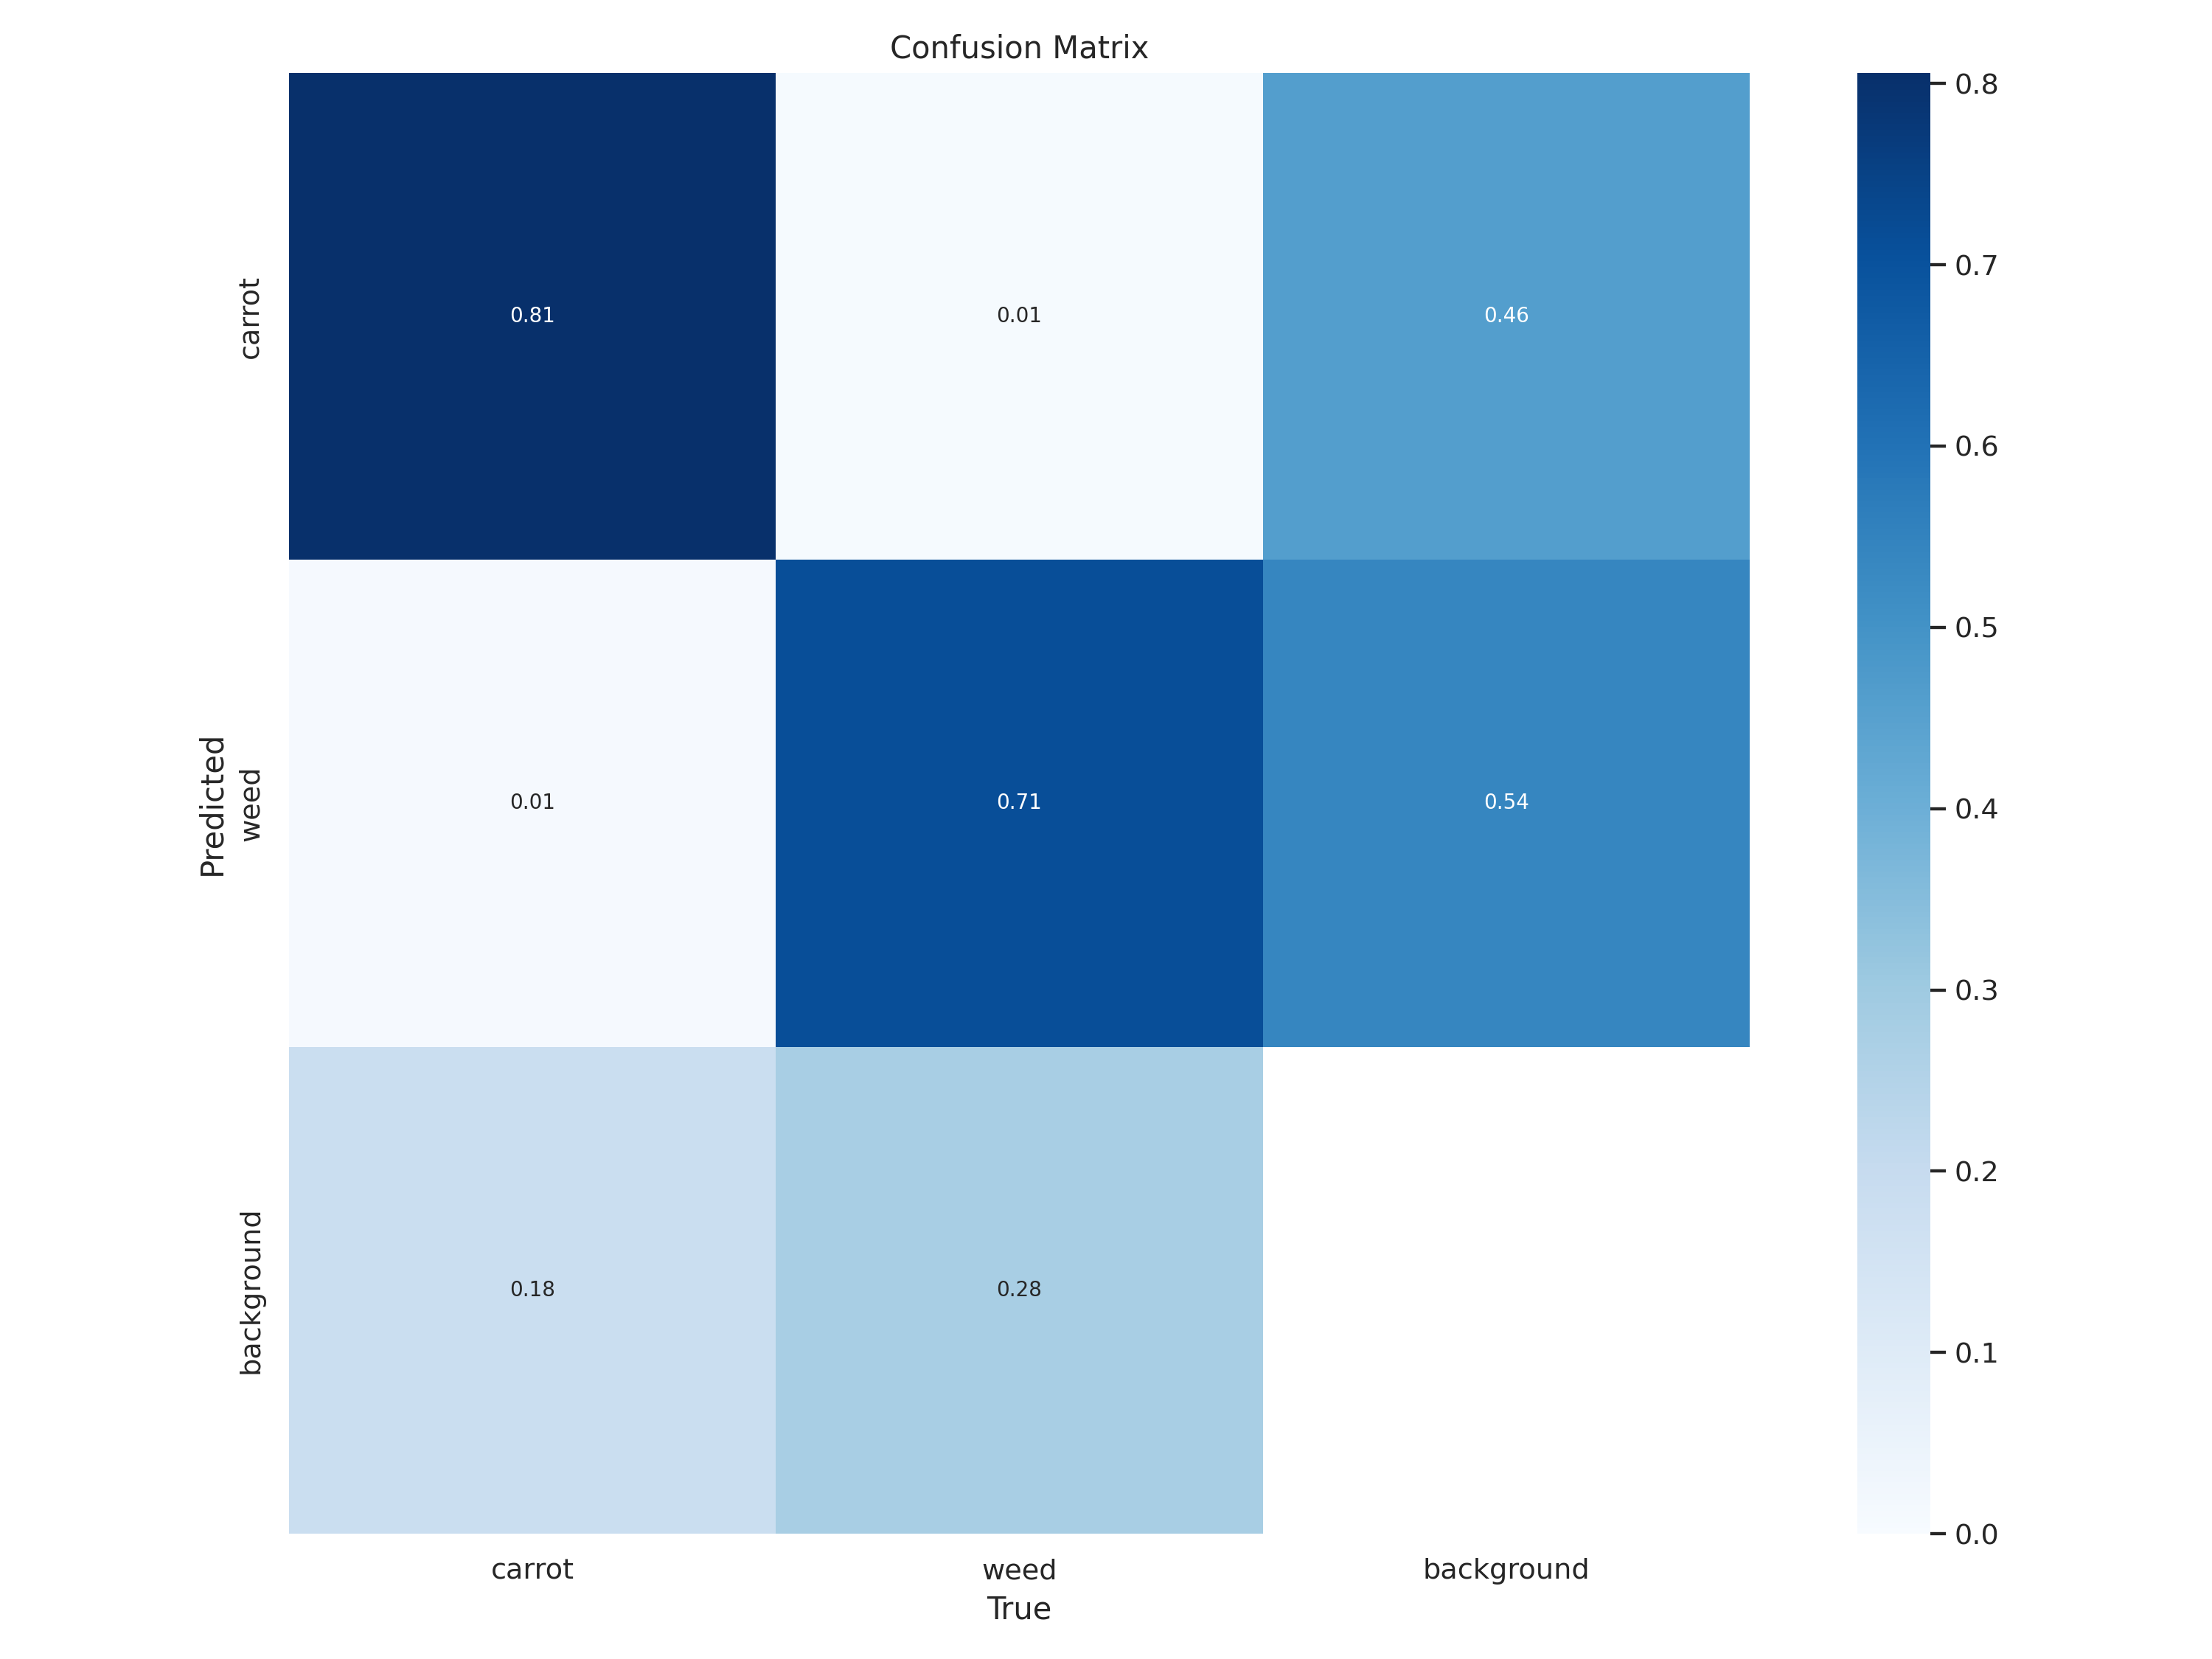

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


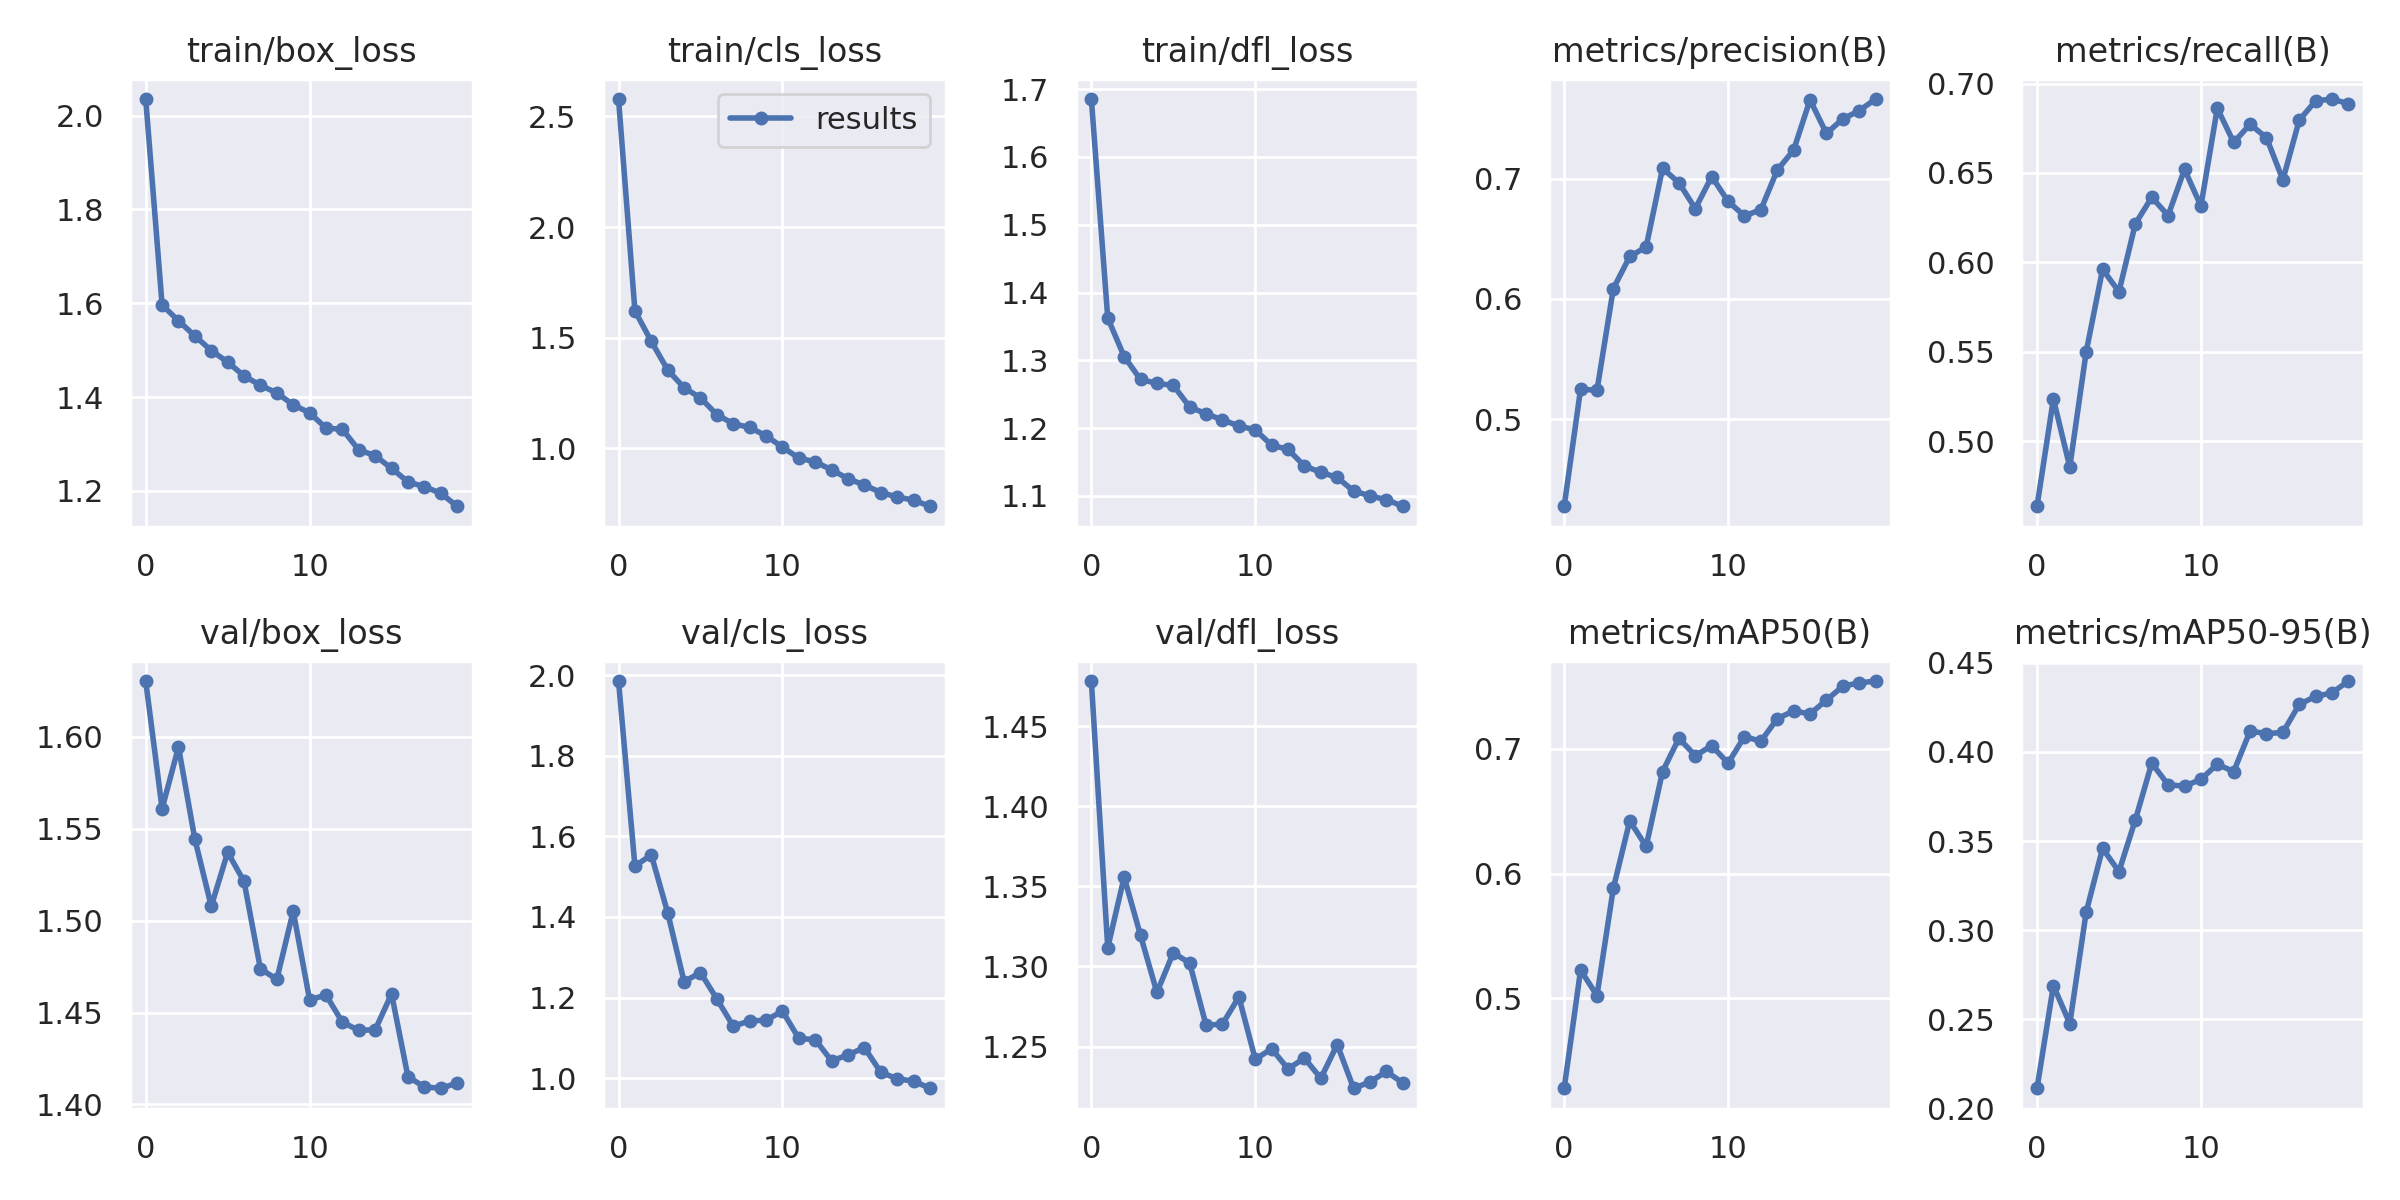

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


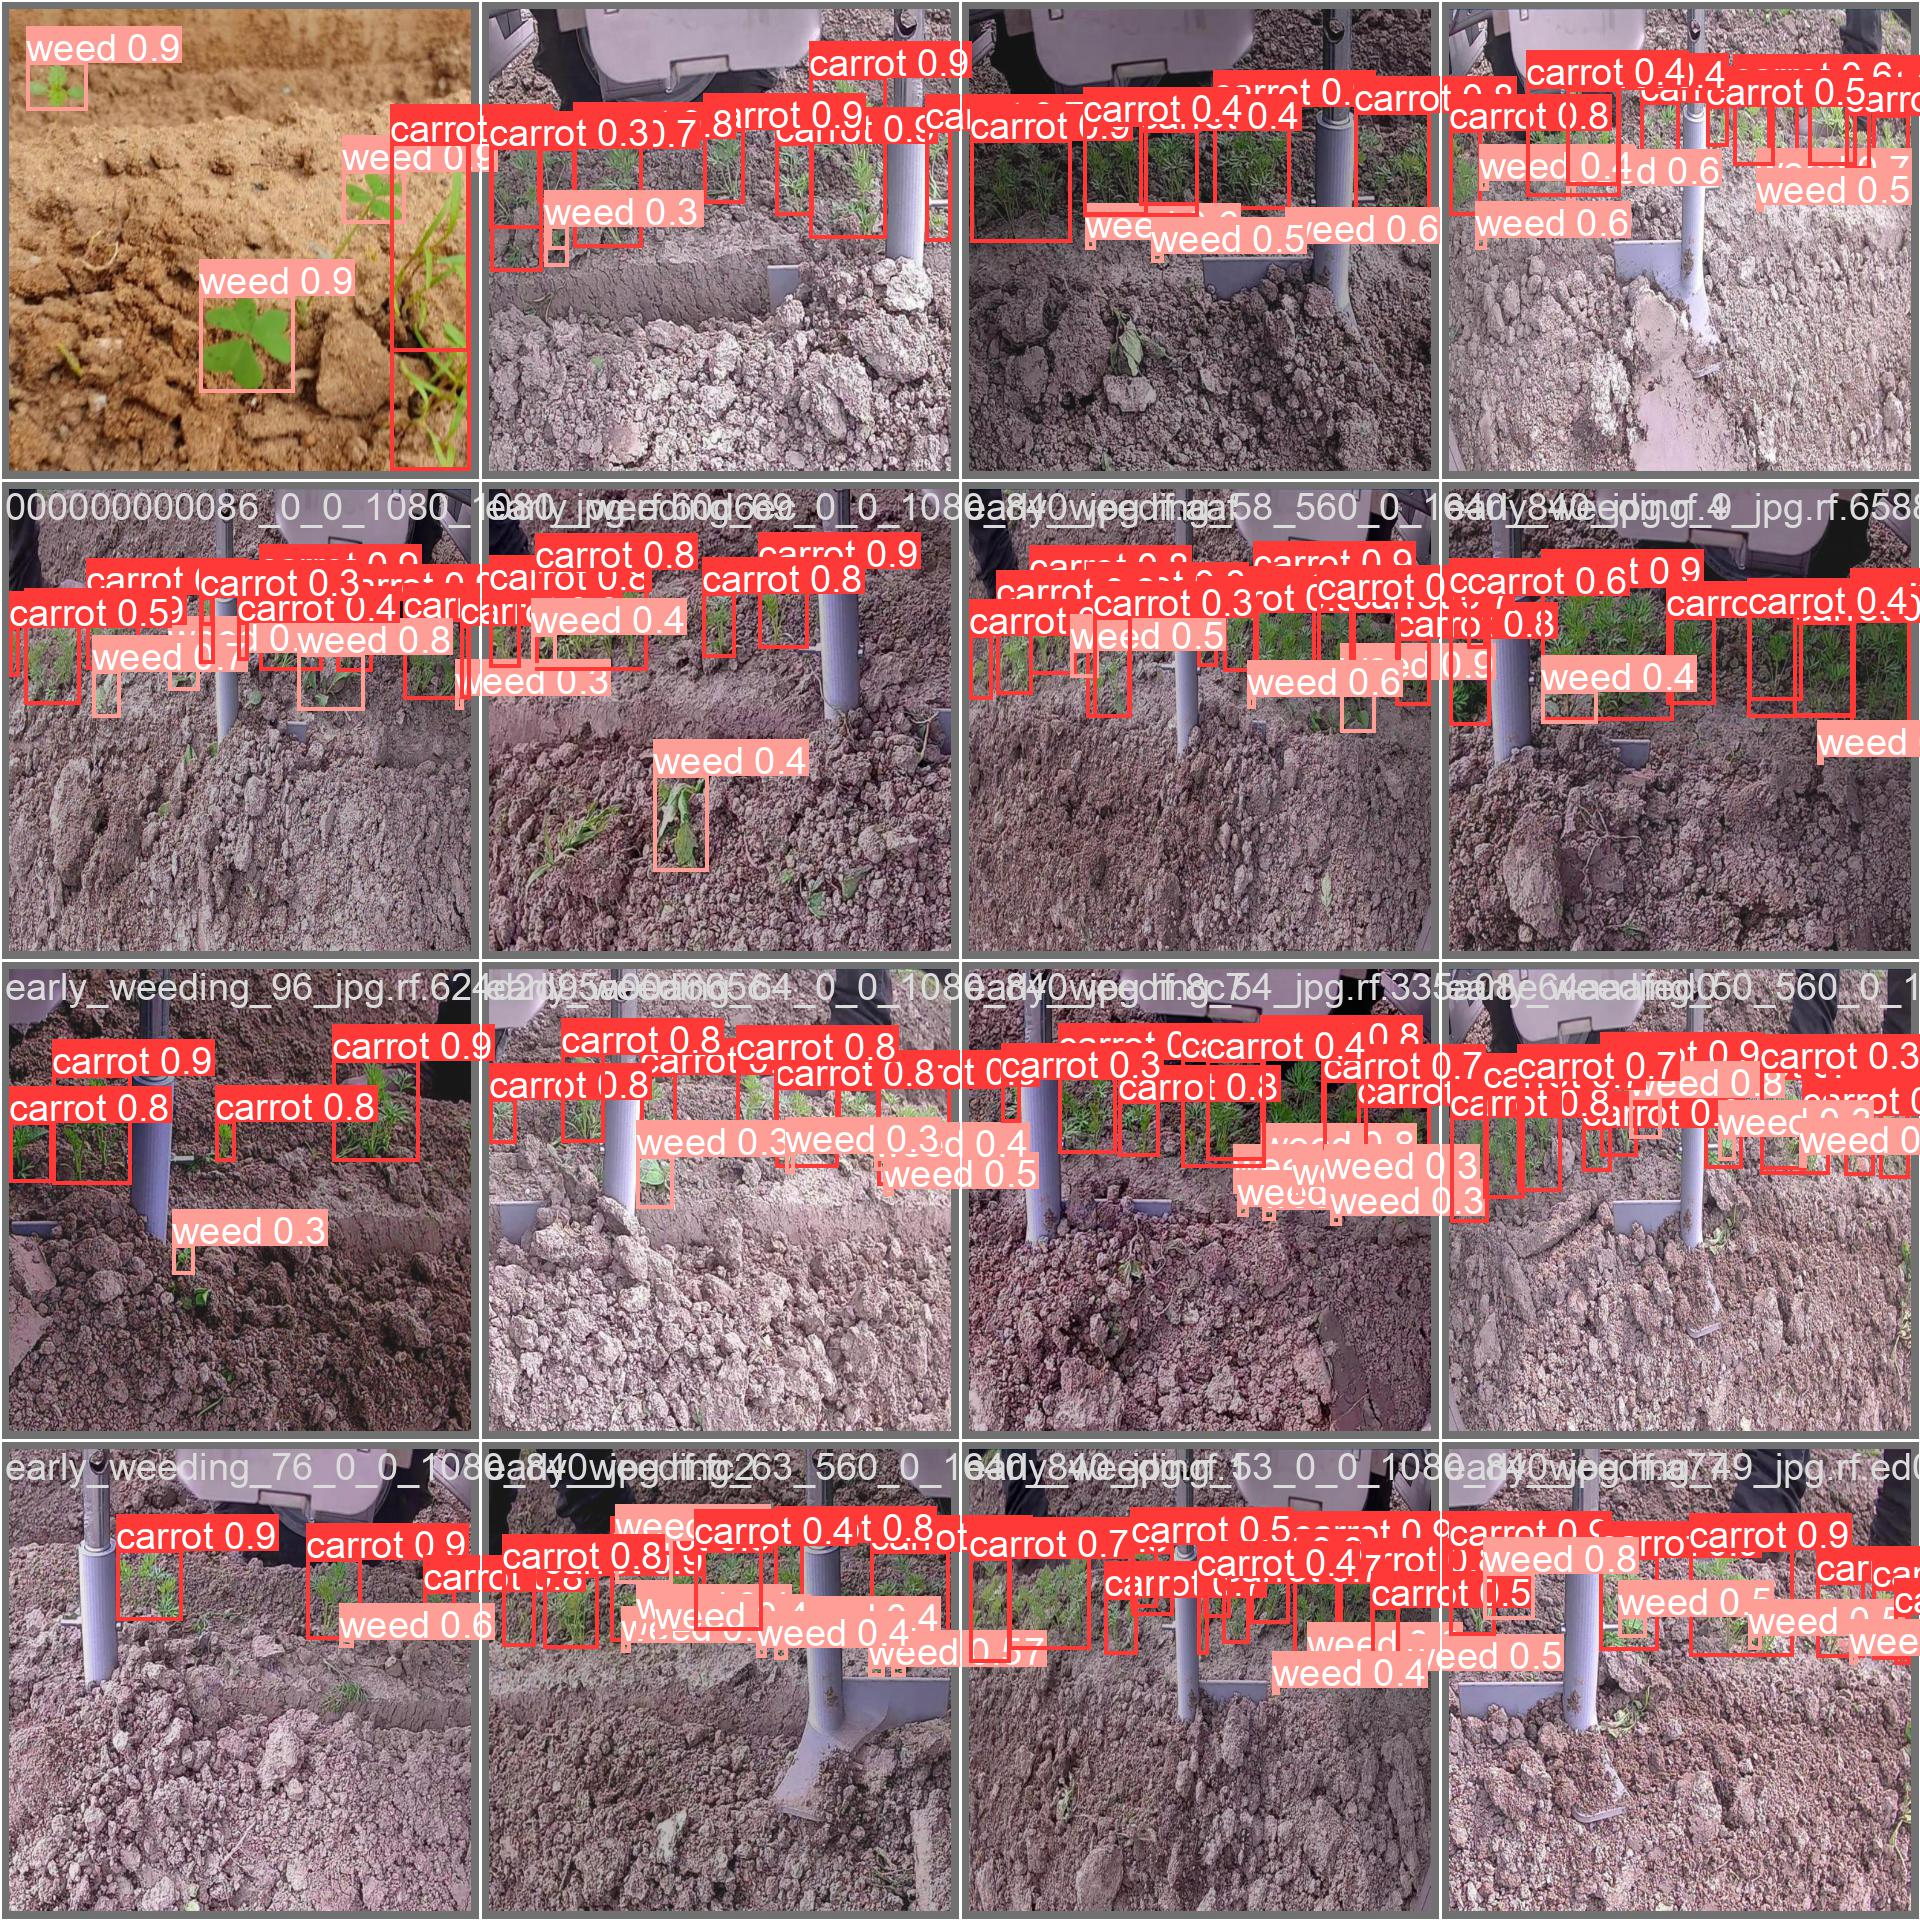

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-04-21 06:35:26.578379: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Weeds-and-Carrot-Counter-2/valid/labels.cache... 114 images, 0 backgrounds, 0 corrupt: 100% 114/114 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:15<00:00,  1.98s/it]
                   all        114       1843      0.769      0.691      0.756      0.441
                carrot        114        649      0.737      0.736      0.761      0.448
                  weed        114       1194        0.8      0.645      0.751      0.433
Speed: 5.5ms pre-process, 20.7ms inference, 0.0ms loss, 17.8ms post-process per image


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-04-21 06:36:52.371542: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/100 /content/datasets/Weeds-and-Carrot-Counter-2/test/images/20210930_172751_264_0_1344_1008_jpg.rf.74aaf809a254a4c157532f5937e6f0f0.jpg: 800x800 8 carrots, 5 weeds, 24.6ms
image 2/100 /content/datasets/Weeds-and-Carrot-Counter-2/test/images/20210930_173044_264_0_1344_1008_jpg.rf.6b4aa8d9fc258dea75c5428118c22fc5.jpg: 800x800 8 carrots, 8 weeds, 24.7ms
image 3/100 /content/datasets/Weeds-and-Carrot-Counter-2/test/images/20211001_113911_0_0_1080_1008_jpg.rf.e0b911cc0066815b5ab575f57f0c7164.jpg: 800x800 19 weeds, 24.7ms
image 4/100 /content/datasets/Weeds-and-Carrot-Counter-2/test/images/20211001_114202_0_0_1080_1008_jpg.rf.804bd568641f977b584c19874df73c57.jpg: 800x800 5 weeds, 24.6ms
i

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:99]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/drive/MyDrive/Datasets/test_sorted/images' save=True save_txt=True retina_masks=True


/content
2023-04-21 07:33:17.932997: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/100 /content/drive/MyDrive/Datasets/test_sorted/images/1.jpg: 800x800 10 carrots, 24.6ms
image 2/100 /content/drive/MyDrive/Datasets/test_sorted/images/10.jpg: 800x800 15 carrots, 38.1ms
image 3/100 /content/drive/MyDrive/Datasets/test_sorted/images/100.jpg: 800x800 11 carrots, 76 weeds, 24.6ms
image 4/100 /content/drive/MyDrive/Datasets/test_sorted/images/11.jpg: 800x800 10 carrots, 1 weed, 24.6ms
image 5/100 /content/drive/MyDrive/Datasets/test_sorted/images/12.jpg: 800x800 9 carrots, 2 weeds, 24.7ms
image 6/100 /content/drive/MyDrive/Datasets/test_sorted/images/13.jpg: 800x800 7 carrots, 1 weed, 24.7ms
image 7/100 /content/drive/MyDrive/Datasets/test_sorted/images/14.jpg: 800x800 

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict7/*.jpg')[:99]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
import cv2
import os
import glob

In [ ]:
def load_images_from_folder(folder_path):
    image_files = glob.glob(os.path.join(folder_path, '*.jpg'))  # Assumes images are in .jpg format
    images = []
    for img_path in sorted(image_files):
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
    return images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

labels_dir = "/content/runs/detect/predict6/labels"
image_counts = {}

for label_file in os.listdir(labels_dir):
    # Extract image ID from label file name
    image_id = os.path.splitext(label_file)[0]

    # Initialize counts for carrots and weeds
    carrot_count = 0
    weed_count = 0

    with open(os.path.join(labels_dir, label_file), "r") as f:
        for line in f:
            class_id = int(line.split()[0])

            if class_id == 0:
                carrot_count += 1
            elif class_id == 1:
                weed_count += 1

    # Save counts for this image ID
    image_counts[image_id] = {"carrots": carrot_count, "weeds": weed_count}

print(image_counts)

{'76': {'carrots': 11, 'weeds': 17}, '90': {'carrots': 7, 'weeds': 32}, '69': {'carrots': 12, 'weeds': 10}, '16': {'carrots': 4, 'weeds': 3}, '5': {'carrots': 14, 'weeds': 1}, '93': {'carrots': 6, 'weeds': 32}, '65': {'carrots': 13, 'weeds': 11}, '51': {'carrots': 13, 'weeds': 7}, '54': {'carrots': 3, 'weeds': 10}, '36': {'carrots': 4, 'weeds': 3}, '64': {'carrots': 13, 'weeds': 12}, '25': {'carrots': 6, 'weeds': 4}, '34': {'carrots': 0, 'weeds': 5}, '70': {'carrots': 5, 'weeds': 14}, '98': {'carrots': 12, 'weeds': 73}, '56': {'carrots': 0, 'weeds': 12}, '13': {'carrots': 7, 'weeds': 1}, '43': {'carrots': 7, 'weeds': 8}, '4': {'carrots': 14, 'weeds': 3}, '7': {'carrots': 6, 'weeds': 4}, '99': {'carrots': 10, 'weeds': 62}, '45': {'carrots': 8, 'weeds': 8}, '80': {'carrots': 12, 'weeds': 16}, '59': {'carrots': 3, 'weeds': 12}, '58': {'carrots': 12, 'weeds': 6}, '32': {'carrots': 4, 'weeds': 9}, '22': {'carrots': 7, 'weeds': 4}, '49': {'carrots': 6, 'weeds': 5}, '46': {'carrots': 13, 'wee

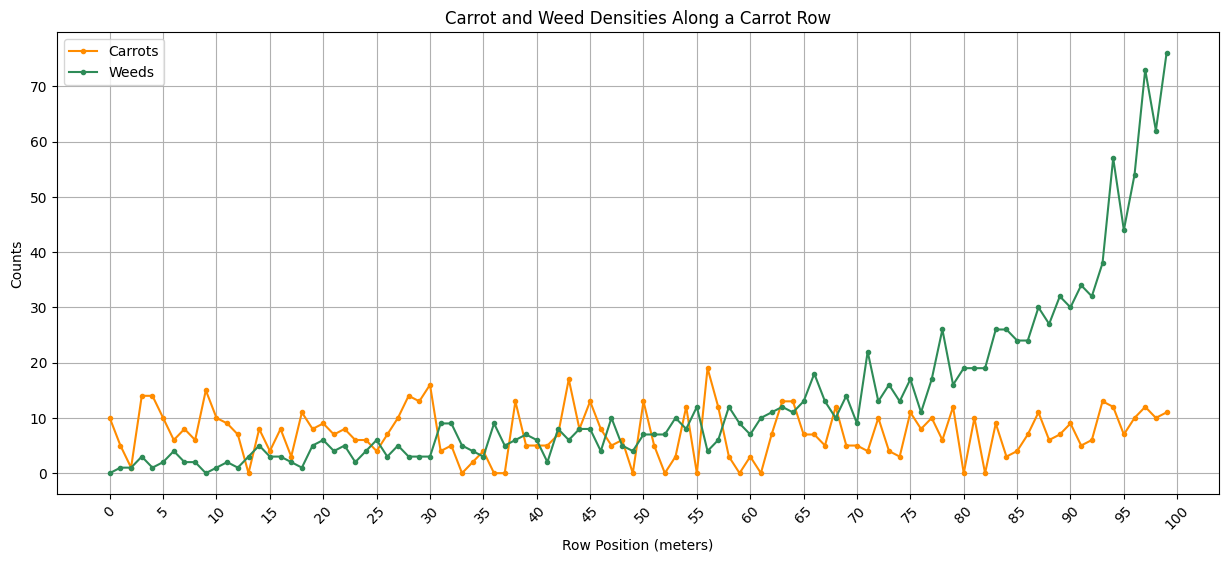

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data from the image_counts dictionary
image_ids = sorted(image_counts.keys(), key=lambda x: int(x))
carrot_counts = [image_counts[image_id]["carrots"] for image_id in image_ids]
weed_counts = [image_counts[image_id]["weeds"] for image_id in image_ids]

# Set up the line graph
fig, ax = plt.subplots(figsize=(15, 6))
carrot_line = ax.plot(image_ids, carrot_counts, label="Carrots", marker='.', linestyle='-', color='darkorange')
weed_line = ax.plot(image_ids, weed_counts, label="Weeds", marker='.', linestyle='-', color='seagreen')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel("Row Position (meters)")
ax.set_ylabel("Counts")
ax.set_title("Carrot and Weed Densities Along a Carrot Row")
tick_labels = [0] + [int(image_id) for image_id in image_ids[4::5]]
ax.set_xticks(tick_labels)
ax.set_xticklabels(tick_labels, rotation=45)
ax.legend()
ax.grid(True)
ax.legend()

# Show the line graph
plt.show()

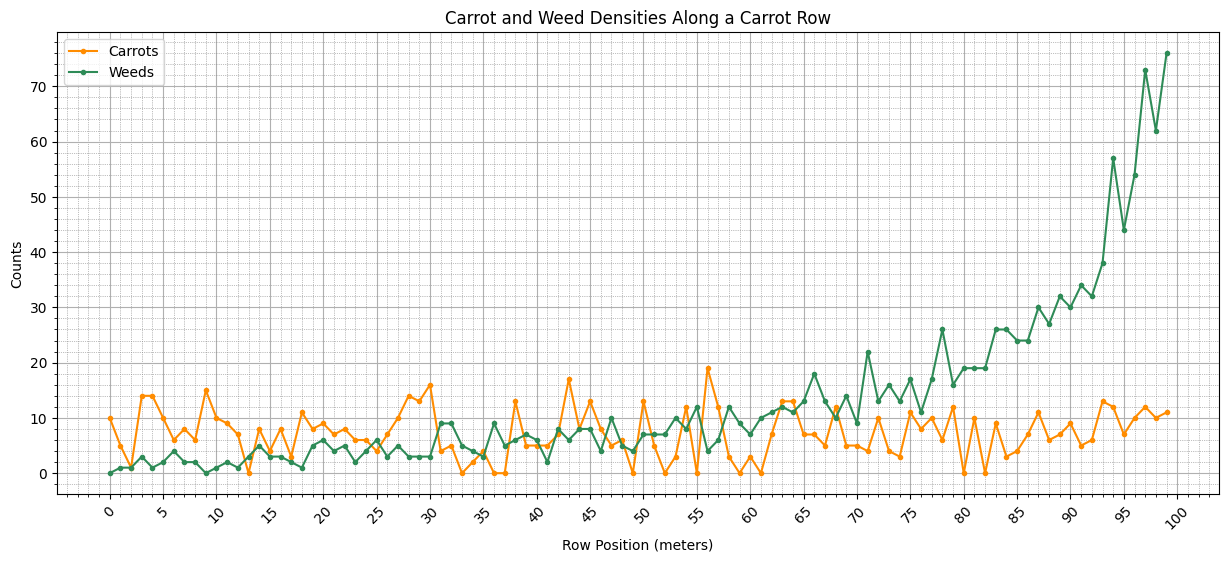

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data from the image_counts dictionary
image_ids = sorted(image_counts.keys(), key=lambda x: int(x))
carrot_counts = [image_counts[image_id]["carrots"] for image_id in image_ids]
weed_counts = [image_counts[image_id]["weeds"] for image_id in image_ids]

# Set up the line graph
fig, ax = plt.subplots(figsize=(15, 6))
carrot_line = ax.plot(image_ids, carrot_counts, label="Carrots", marker='.', linestyle='-', color='darkorange')
weed_line = ax.plot(image_ids, weed_counts, label="Weeds", marker='.', linestyle='-', color='seagreen')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel("Row Position (meters)")
ax.set_ylabel("Counts")
ax.set_title("Carrot and Weed Densities Along a Carrot Row")
tick_labels = [0] + [int(image_id) for image_id in image_ids[4::5]]
ax.set_xticks(tick_labels)
ax.set_xticklabels(tick_labels, rotation=45)
ax.legend()

# Add grid and minor ticks
ax.grid(True)
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

# Show the line graph
plt.show()